## WEEK 2 RECAP

### Learning Objectives
- Use vectorization to implement multiple linear regression
- Use feature scaling, feature engineering, and polynomial regression to improve model training
- Implement linear regression in code

### Note:

This notebook is my **original code** for me to assess my understanding about what I have learned in **Week 2**

In this one, I will perform **Multiple Linear Regression** with **Gradient Descent** on an easy dataset. I will perform **Feature Scaling** beforehand.

In [5]:
import math

import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Create dataset
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
X_features = ["size", "bedroom", "floor", "age"]

In [7]:
# Dataset overview
print("Training example")
print(f"{X_train.shape[0]} examples, each contains {X_train.shape[1]} features\n")
print(f"Features, {X_train.shape}")
print(X_train)
print(f"Targets, {y_train.shape}")
print(y_train)

Training example
3 examples, each contains 4 features

Features, (3, 4)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
Targets, (3,)
[460 232 178]


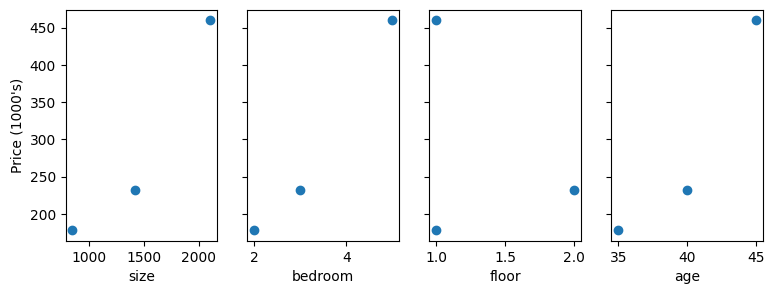

In [8]:
# Plotting each feature vs target to see which feature affect the target price the most
# However, the data is too small so we shouldn't plot them out
fig, ax=plt.subplots(1, 4, figsize=(9, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [ ]:
# Feature scaling

In [9]:
# Initial values for w and b
w_init = np.zeros(X_train.shape[1])  # w is an array of length n (features)
b_init = 0

In [10]:
# Cost function
def compute_cost(X_train, y_train, w, b):
    """
    Compute cost of model at (w, b)

    Args:
        X_train (ndarray) (m, n): features
        y_train (ndarray) (m,): targets
        w (ndarray) (n,): model parameter
        b (scalar): model parameter

    Returns:
        float: cost
    """
    
    m = X_train.shape[0]
    total_cost = 0
    
    for i in range(m):
        cost = (np.dot(w, X_train[i]) + b - y_train[i]) ** 2
        total_cost += cost
        
    total_cost /= 2 * m
    
    return total_cost

In [11]:
# Gradient function
def compute_gradient(X_train, y_train, w, b):
    """
    Gradient dj_dw_j and dj_db at (w, b)

    Args:
        X_train (ndarray) (m, n): features
        y_train (ndarray) (m,): targets
        w (ndarray) (n,): model parameter
        b (scalar): model parameter

    Returns:
        dj_dw_j (ndarray) (n,): gradient wrt wj
        dj_db (scalar): gradient wrt b
    """
    
    m, n = X_train.shape
    dj_dw_j = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        error = np.dot(w, X_train[i]) + b - y_train[i]
        for j in range(n):
            dj_dw_j[j] += error * X_train[i, j]
        dj_db += error
        
    dj_dw_j /= m
    dj_db /= m
    
    return dj_dw_j, dj_db

In [12]:
# Gradient descent function
def gradient_descent(X_train, y_train, w_init, b_init, alpha, num_iters, gradient_function, cost_function):
    """
    Find the optimal w and b

    Args:
        X_train (ndarray) (m, n): features
        y_train (ndarray) (m,): targets
        w_init (ndarray) (n,): model parameter
        b_init (scalar): model parameter
        alpha (float): learning rate
        num_iters (int): # iterations
        gradient_function (function): compute_gradient
        cost_function (function): cost function
        
    Returns:
        w (ndarray) (n,): w_optimal
        b (scalar): b_optimal
    """
    
    w, b = w_init, b_init
    
    for i in range(num_iters):
        dj_dw_j, dj_db = gradient_function(X_train, y_train, w, b)
        
        # for index, gradient in enumerate(dj_dw_j):
        #     w[index] = w[index] - alpha * gradient
        w = w - alpha * dj_dw_j
        b = b - alpha * dj_db
        
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Cost at iter # {i} = {cost_function(X_train, y_train, w, b)}")
            
    return w, b

In [13]:
# Use functions above to find w optimal and b optimal
w_optimal, b_optimal = gradient_descent(X_train, y_train, w_init, b_init, 5.0e-7, 1000, compute_gradient, compute_cost)
print(f"w optimal = {w_optimal}\nb optimal = {b_optimal}")

Cost at iter # 0 = 2529.4629522316304
Cost at iter # 100 = 695.990315835203
Cost at iter # 200 = 694.9206979323061
Cost at iter # 300 = 693.8604297851192
Cost at iter # 400 = 692.8094286135905
Cost at iter # 500 = 691.7676123706057
Cost at iter # 600 = 690.7348997354997
Cost at iter # 700 = 689.711210107616
Cost at iter # 800 = 688.6964635999458
Cost at iter # 900 = 687.6905810327947
w optimal = [ 0.20396569  0.00374919 -0.0112487  -0.0658614 ]
b optimal = -0.002235407530932535


In [14]:
# Predict training example
for i in range(X_train.shape[0]):
    print(f"Example {i + 1}'s prediction: {np.dot(w_optimal, X_train[i]) + b_optimal} | Target value y = {y_train[i]}")

Example 1's prediction: 426.18530497189204 | Target value y = 460
Example 2's prediction: 286.1674720078562 | Target value y = 232
Example 3's prediction: 171.46763087132317 | Target value y = 178
